# Regressão de Vetor Suporte
Regrassão baseada na Máquina de Vetor Suporte

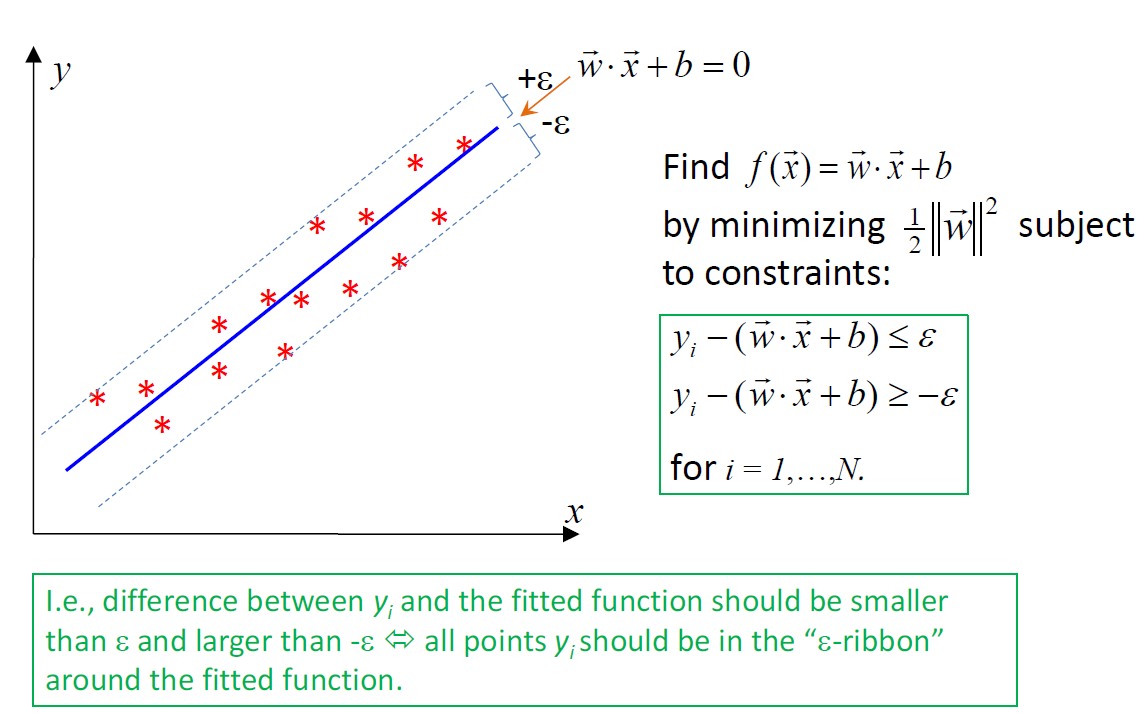

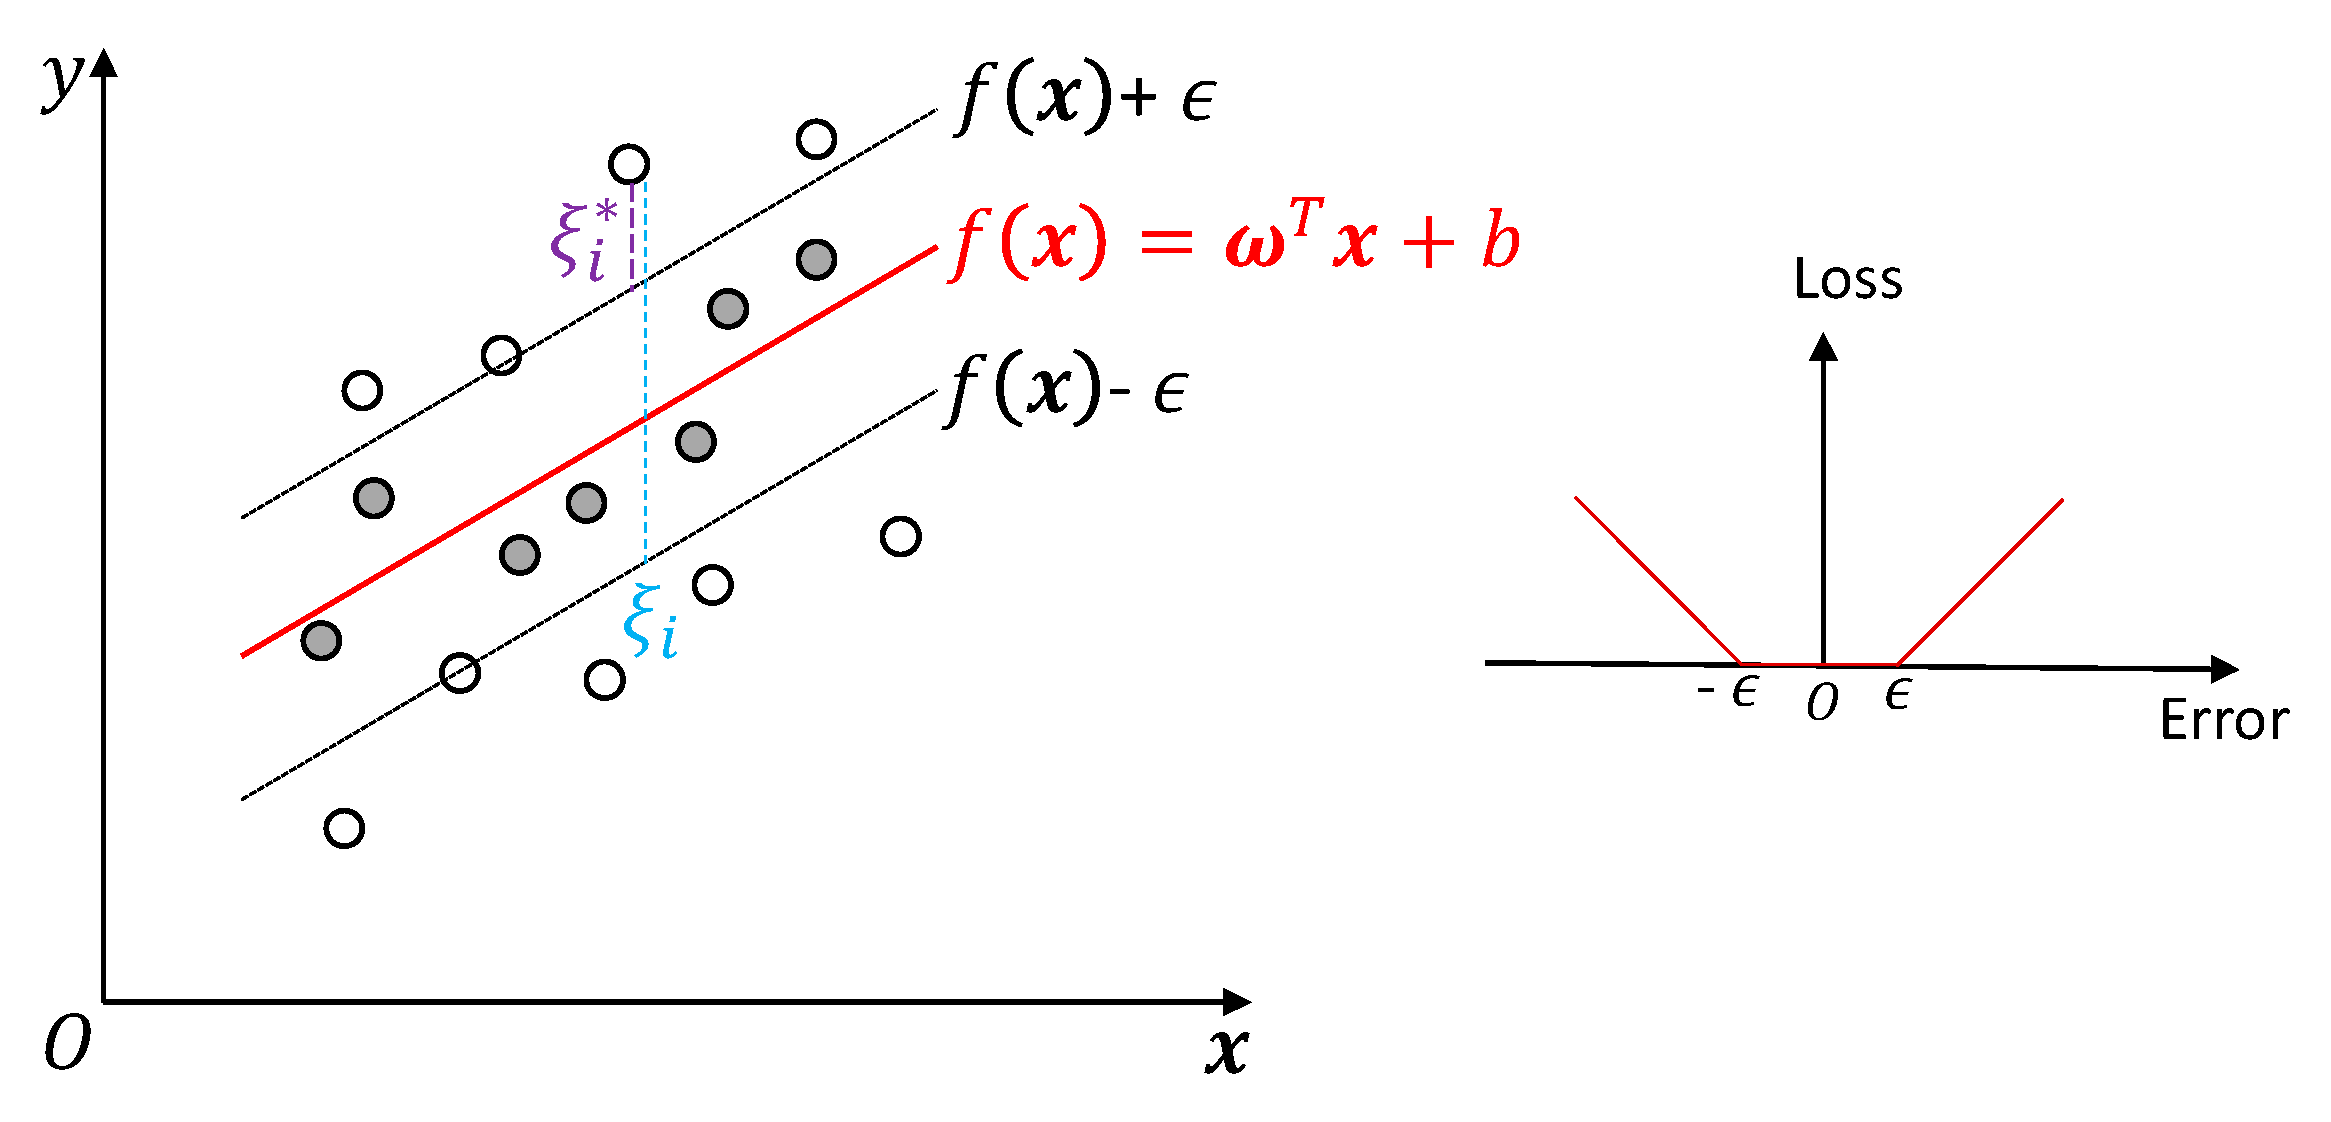

## Imports

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
    
from functools import wraps

## Carregando Base de Dados

In [2]:
!rm -r MLUD
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 154 (delta 57), reused 39 (delta 4), pack-reused 0
Receiving objects: 100% (154/154), 548.02 KiB | 790.00 KiB/s, done.
Resolving deltas: 100% (57/57), done.


## Funções de Pré-Processamento

In [3]:
def loadDataset(filename):
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    
    return X, y, baseDeDados

def fillMissingData(X, inicioColuna, fimColuna):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    
    return X

#só funciona se i = 0 ou i = ultima coluna
def computeCategorization(X, i):
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

    #one hot encoding
    D = pd.get_dummies(X[:,i]).values
    if(i == 0):
        X = X[:,1:]
        X = np.insert(X, 0, D, axis=1)

        #removendo dummy variable trap
        X = X[:,1:]
    else:
        X = X[:,:i]
        for j in range(0, D.shape[1]):
            X = np.insert(X, i, D[:,j], axis=1)

        #removendo dummy variable trap
        X = X[:,:-1]
    
    return X

def splitTrainTestSets(X, y, testSize):
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    
    return XTrain, XTest, yTrain, yTest

def computeScaling(X):
    scale = StandardScaler()
    X = scale.fit_transform(X)
    
    return X, scale

## Funções Auxiliares

In [4]:
def showplot(XPoints, yPoints, XLine, yLine):
    plt.scatter(XPoints, yPoints, color='r')
    plt.plot(XLine, yLine, color='b')
    plt.title('Comparando pontos reais com reta produzida pela Regressão de Vetor Suporte.')
    plt.xlabel('Experiência em anos')
    plt.ylabel('Salário')
    plt.show()

## Regressão de Vetor Suporte

In [5]:
def computeSupportVectorRegressionModel(X, y, k, d=2):
    if (k == 'poly'):
        regressor = SVR(kernel=k, degree=d)
    else:
        regressor = SVR(kernel=k)
    regressor.fit(X, np.ravel(y))           # Como o y foi previamente transformado em matriz, o np.ravel o converte novamente para um vetor

    return regressor

def runSupportVectorRegressionExample(filename, kernel='linear', degree=2, printY=False):
    start_time = time.time()
    X, y, csv = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print('Load Dataset: %.2f' % elapsed_time, 'segundos.')

    if(printY):
        print('Y original:\n', y)
        print('\n\nY como "matriz":\n', np.reshape(y, (-1, 1)))
        
    start_time = time.time()
    X, scaleX = computeScaling(X)
    y, scaleY = computeScaling(np.reshape(y, (-1, 1)))          #np.reshape(y, (-1, 1)) transforma y em uma matriz
    elapsed_time = time.time() - start_time
    print('Compute Scaling: %.2f' % elapsed_time, 'segundos.')

    start_time = time.time()
    svrModel = computeSupportVectorRegressionModel(X, y, kernel, degree)
    elapsed_time = time.time() - start_time
    print('Compute Support Vector Regression with kernel "%s": %.2f' % (kernel.upper(), elapsed_time), 'segundos.')
    
    showplot(scaleX.inverse_transform(X), scaleY.inverse_transform(y), scaleX.inverse_transform(X), scaleY.inverse_transform(svrModel.predict(X)))

Load Dataset: 0.01 segundos.
Compute Scaling: 0.00 segundos.
Compute Support Vector Regression with kernel "LINEAR": 0.00 segundos.


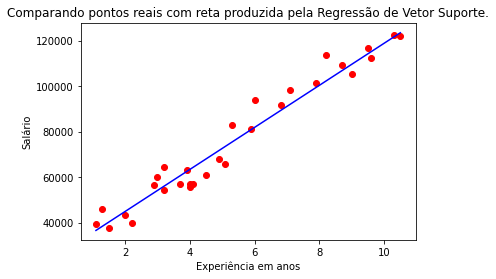

In [6]:
runSupportVectorRegressionExample('MLUD/Aula08/salary.csv', kernel='linear')

Load Dataset: 0.00 segundos.
Compute Scaling: 0.00 segundos.
Compute Support Vector Regression with kernel "POLY": 0.00 segundos.


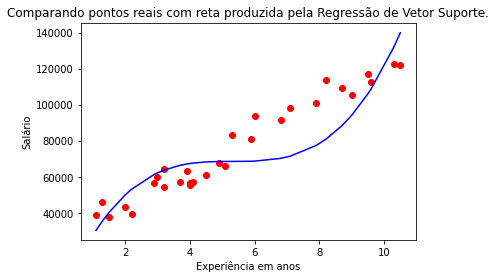

In [7]:
runSupportVectorRegressionExample('MLUD/Aula08/salary.csv', kernel='poly', degree=3)

Load Dataset: 0.00 segundos.
Compute Scaling: 0.00 segundos.
Compute Support Vector Regression with kernel "RBF": 0.00 segundos.


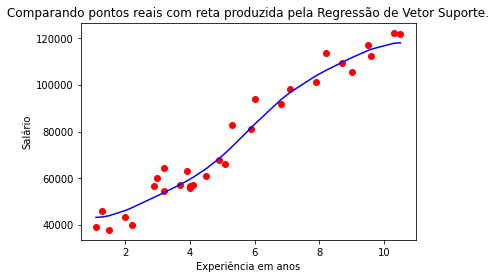

In [8]:
runSupportVectorRegressionExample('MLUD/Aula08/salary.csv', kernel='rbf')